# Disclaimer

This file is a collection of old code that was being used in that new investigation of Ethereum. It's just being used as a backup for now, it will eventually be removed from here and refactored into Investigation.ipynb file once it's more organized and ready.

In [3]:
df_a = dd.read_csv('light-september21_0.csv')
df_b = dd.read_csv('light-september21_1.csv')

df_a = df_a[['block_timestamp','from_address', 'to_address']]
df_b = df_b[['block_timestamp','from_address', 'to_address']]

df_c = dd.concat([df_a, df_b])
df_c

,block_timestamp,from_address,to_address
npartitions=103,,,
,int64,object,object
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [4]:
df = df_c.compute()
df

,block_timestamp,from_address,to_address
0,1630458550,0x0f4ee9631f4be0a63756515141281a3e2b293bbe,0xe592427a0aece92de3edee1f18e0157c05861564
1,1630458550,0x927cf8ceae6efb1b7e81f5a7907e0e46d41619f8,0x4d246be90c2f36730bb853ad41d0a189061192d3
2,1630458550,0x69181a03fd84d1e2679eb520dfde72c97e1ce524,0xa57bd00134b2850b2a1c55860c9e9ea100fdd6cf
3,1630458550,0x052fdcfb81d8234def61076999b095b75da8fa36,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b
4,1630458550,0xdec08cb92a506b88411da9ba290f3694be223c26,0x3b1bb53b1a42ff61b7399fc196469a742cd3e98d
...,...,...,...
132780,1632936798,0xd4733139a51004c8c879d1e10c9ddab411050e27,0x454cbc099079dc38b145e37e982e524af3279c44
132781,1632936798,0x5905e999425cd9f9e1cd2d9339b25789e46cf936,0x3e349511dc3d2c255b9eb92ad0c9d700f30d2972
132782,1632936798,0xc6d84b7333ccf2db3362f5acd944da2dcc304d06,0x3e349511dc3d2c255b9eb92ad0c9d700f30d2972
132783,1632936798,0x967ea8152b515229762708168c70866838223536,0xc5b6488c7d5bed173b76bd5dca712f45fb9eaeab


In [5]:
timestamp_start = 1630454400
week_interval = 604800 #difference in seconds between weeks

In [6]:
l1 = timestamp_start + week_interval
l2 = l1 + week_interval
l3 = l2 + week_interval

df_1 = df.query('block_timestamp <= '+ str(l1))
df_2 = df.query('block_timestamp > '+ str(l1)+' and block_timestamp <= '+ str(l2))
df_3 = df.query('block_timestamp > '+ str(l2)+' and block_timestamp <= '+ str(l3))
df_4 = df.query('block_timestamp > '+ str(l3))

In [7]:
df_deg1 = df_1.groupby(['from_address'])[['from_address']].count().rename(columns = {'from_address': 'outdegree'})
df_deg2 = df_2.groupby(['from_address'])[['from_address']].count().rename(columns = {'from_address': 'outdegree'})
df_deg3 = df_3.groupby(['from_address'])[['from_address']].count().rename(columns = {'from_address': 'outdegree'})
df_deg4 = df_4.groupby(['from_address'])[['from_address']].count().rename(columns = {'from_address': 'outdegree'})

In [14]:
df_deg5 = df_1.groupby(['to_address'])[['to_address']].count().rename(columns = {'to_address': 'indegree'})
df_deg6 = df_2.groupby(['to_address'])[['to_address']].count().rename(columns = {'to_address': 'indegree'})
df_deg7 = df_3.groupby(['to_address'])[['to_address']].count().rename(columns = {'to_address': 'indegree'})
df_deg8 = df_4.groupby(['to_address'])[['to_address']].count().rename(columns = {'to_address': 'indegree'})

In [20]:
df_compare = df_deg1.merge(df_deg2, on = 'from_address', suffixes= ('_1','_2'), how = 'inner')
df_compare = df_compare.merge(df_deg3.rename(columns = {'outdegree' : 'outdegree_3'}), on = 'from_address', how = 'inner')
df_compare = df_compare.merge(df_deg4.rename(columns = {'outdegree' : 'outdegree_4'}), on = 'from_address', how = 'inner')
df_compare2 = df_deg5.merge(df_deg6, on = 'to_address', suffixes= ('_1','_2'), how = 'inner')
df_compare2 = df_compare2.merge(df_deg7.rename(columns = {'indegree' : 'indegree_3'}), on = 'to_address', how = 'inner')
df_compare2 = df_compare2.merge(df_deg8.rename(columns = {'indegree' : 'indegree_4'}), on = 'to_address', how = 'inner')
df_compare2

,indegree_1,indegree_2,indegree_3,indegree_4
to_address,,,,
0x0000000000000000000000000000000000000000,139,1715,197,117
0x0000000000000000000000000000000000000001,41,69,23,10
0x000000000000000000000000000000000000dead,6,4,18,10
0x000000000000006f6502b7f2bbac8c30a3f67e9a,166,285,189,228
0x000000000000084e91743124a982076c59f10084,779,787,705,697
...,...,...,...,...
0xffff7879a47194cb45d170329ae17bc937527f23,1,2,2,2
0xffffce648a906ed4b2b203f7856e104bc2784d6e,1,1,1,1
0xfffff73b511802ad4e51807dc516c191f23e9a6f,7,5,4,2


In [34]:
#df_compare.rename(index = {'from_address': 'address'}).merge(df_compare2.rename(index = {'to_address': 'address'}), on = 'address', how = 'outer')
df_full = pd.merge(df_compare, df_compare2, left_index = True, right_index = True, how = 'outer').fillna(0)
df_full['degree_1'] = df_full['outdegree_1'] + df_full['indegree_1']
df_full['degree_2'] = df_full['outdegree_2'] + df_full['indegree_2']
df_full['degree_3'] = df_full['outdegree_3'] + df_full['indegree_3']
df_full['degree_4'] = df_full['outdegree_4'] + df_full['indegree_4']
df_full

,outdegree_1,outdegree_2,outdegree_3,outdegree_4,indegree_1,indegree_2,indegree_3,indegree_4,degree_1,degree_2,degree_3,degree_4
0x0000000000000000000000000000000000000000,0.0,0.0,0.0,0.0,139.0,1715.0,197.0,117.0,139.0,1715.0,197.0,117.0
0x0000000000000000000000000000000000000001,0.0,0.0,0.0,0.0,41.0,69.0,23.0,10.0,41.0,69.0,23.0,10.0
0x000000000000000000000000000000000000dead,0.0,0.0,0.0,0.0,6.0,4.0,18.0,10.0,6.0,4.0,18.0,10.0
0x000000000000006f6502b7f2bbac8c30a3f67e9a,0.0,0.0,0.0,0.0,166.0,285.0,189.0,228.0,166.0,285.0,189.0,228.0
0x000000000000084e91743124a982076c59f10084,0.0,0.0,0.0,0.0,779.0,787.0,705.0,697.0,779.0,787.0,705.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...
0xfffffffa07551e264b6e6196d2ab4604f2539bf4,12.0,30.0,26.0,8.0,0.0,0.0,0.0,0.0,12.0,30.0,26.0,8.0
0xfffffffd36ae82df6691a342cbbc4b931729e67e,12.0,17.0,55.0,44.0,0.0,0.0,0.0,0.0,12.0,17.0,55.0,44.0
0xffffffff2ba8f66d4e51811c5190992176930278,0.0,0.0,0.0,0.0,64.0,63.0,74.0,116.0,64.0,63.0,74.0,116.0
0xfffffffff15abf397da76f1dcc1a1604f45126db,0.0,0.0,0.0,0.0,48.0,31.0,26.0,17.0,48.0,31.0,26.0,17.0


In [ ]:

df_compare['diff1'] = df_compare['outdegree_1'] - df_compare['outdegree_2']
df_compare['diff2'] = df_compare['outdegree_2'] - df_compare['outdegree_3']
df_compare['diff3'] = df_compare['outdegree_3'] - df_compare['outdegree_4']
df_compare['diff_total'] = df_compare['diff1'] + df_compare['diff2'] + df_compare['diff3']
df_top5 = df_compare.sort_values(by = ['diff_total'], ascending=False).iloc[:5]
df_top5

In [40]:
df_full['diff1'] = df_full['degree_1'] - df_full['degree_2']
df_full['diff2'] = df_full['degree_2'] - df_full['degree_3']
df_full['diff3'] = df_full['degree_3'] - df_full['degree_4']
df_full['diff_total'] = df_full['diff1'] + df_full['diff2'] + df_full['diff3']
df_top5 = df_full.sort_values(by = ['diff_total'], ascending=False).iloc[:5].rename_axis('Endereço')
df_top5

,outdegree_1,outdegree_2,outdegree_3,outdegree_4,indegree_1,indegree_2,indegree_3,indegree_4,degree_1,degree_2,degree_3,degree_4,diff1,diff2,diff3,diff_total
Endereço,,,,,,,,,,,,,,,,
0x1dfe7ca09e99d10835bf73044a23b73fc20623df,0.0,0.0,0.0,0.0,104595.0,21577.0,5136.0,4756.0,104595.0,21577.0,5136.0,4756.0,83018.0,16441.0,380.0,99839.0
0x9696f59e4d72e237be84ffd425dcad154bf96976,94476.0,64312.0,54139.0,57781.0,88.0,169.0,93.0,194.0,94564.0,64481.0,54232.0,57975.0,30083.0,10249.0,-3743.0,36589.0
0xf497253c2bb7644ebb99e4d9ecc104ae7a79187a,0.0,0.0,0.0,0.0,34885.0,3538.0,1433.0,452.0,34885.0,3538.0,1433.0,452.0,31347.0,2105.0,981.0,34433.0
0x21a31ee1afc51d94c2efccaa2092ad1028285549,112965.0,84984.0,73794.0,80921.0,63.0,191.0,110.0,115.0,113028.0,85175.0,73904.0,81036.0,27853.0,11271.0,-7132.0,31992.0
0x56eddb7aa87536c09ccc2793473599fd21a8b17f,95719.0,67219.0,58133.0,64418.0,72.0,278.0,48.0,99.0,95791.0,67497.0,58181.0,64517.0,28294.0,9316.0,-6336.0,31274.0


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

ax = sns.lineplot(data = df_top5, x = 'from_address', y = 'diff_total')
ax.tick_params(axis='x', rotation=90)
plt.show()

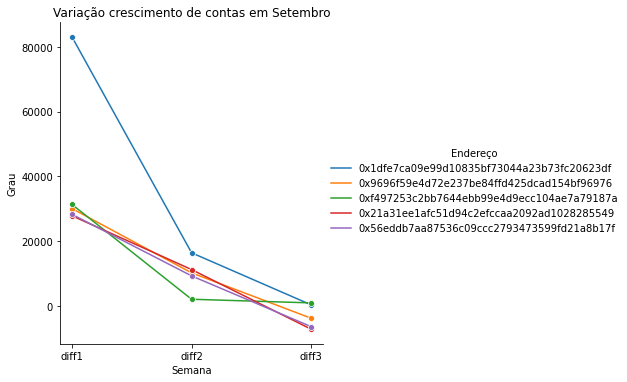

In [41]:
df_aux = pd.melt(df_top5.reset_index(), id_vars = ['Endereço'], value_vars = ['diff1', 'diff2', 'diff3'])
df_aux = df_aux.rename(columns = {'variable': 'Semana', 'value': 'Grau'})
sns.relplot(data = df_aux, x = 'Semana', y = 'Grau', hue = 'Endereço', kind = 'line', marker = 'o').set(title = 'Variação crescimento de contas em Setembro')

Daqui pra baixo eu vou tentar deixar o código organizado eu juro

_Assinado, Pedro do Passado_


---

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dask.dataframe as dd

In [23]:
def divideMonthInWeeks(timestamp_start, df_):
    week_interval = 604800 #difference in seconds between weeks
    l1 = timestamp_start + week_interval
    l2 = l1 + week_interval
    l3 = l2 + week_interval
    df_1 = df_.query('block_timestamp <= '+ str(l1))
    df_2 = df_.query('block_timestamp > '+ str(l1)+' and block_timestamp <= '+ str(l2))
    df_3 = df_.query('block_timestamp > '+ str(l2)+' and block_timestamp <= '+ str(l3))
    df_4 = df_.query('block_timestamp > '+ str(l3))
    return [df_1, df_2, df_3, df_4]

def monthAnalysis(timestamp_start, df_, month_name):
    df_1, df_2, df_3, df_4 = divideMonthInWeeks(timestamp_start, df_)
    #Auxiliary dataframes for outdegree
    df_deg1 = df_1.groupby(['from_address'])[['from_address']].count().rename(columns = {'from_address': 'outdegree'})
    return df_deg1
    df_deg2 = df_2.groupby(['from_address'])[['from_address']].count().rename(columns = {'from_address': 'outdegree'})
    df_deg3 = df_3.groupby(['from_address'])[['from_address']].count().rename(columns = {'from_address': 'outdegree'})
    df_deg4 = df_4.groupby(['from_address'])[['from_address']].count().rename(columns = {'from_address': 'outdegree'})
    #Auxiliary dataframes for indegree
    df_deg5 = df_1.groupby(['to_address'])[['to_address']].count().rename(columns = {'to_address': 'indegree'})
    df_deg6 = df_2.groupby(['to_address'])[['to_address']].count().rename(columns = {'to_address': 'indegree'})
    df_deg7 = df_3.groupby(['to_address'])[['to_address']].count().rename(columns = {'to_address': 'indegree'})
    df_deg8 = df_4.groupby(['to_address'])[['to_address']].count().rename(columns = {'to_address': 'indegree'})

    #Group all the accounts
    df_compare = df_deg1.merge(df_deg2, on = 'from_address', suffixes= ('_1','_2'), how = 'inner')
    df_compare = df_compare.merge(df_deg3.rename(columns = {'outdegree' : 'outdegree_3'}), on = 'from_address', how = 'inner')
    df_compare = df_compare.merge(df_deg4.rename(columns = {'outdegree' : 'outdegree_4'}), on = 'from_address', how = 'inner')
    df_compare2 = df_deg5.merge(df_deg6, on = 'to_address', suffixes= ('_1','_2'), how = 'inner')
    df_compare2 = df_compare2.merge(df_deg7.rename(columns = {'indegree' : 'indegree_3'}), on = 'to_address', how = 'inner')
    df_compare2 = df_compare2.merge(df_deg8.rename(columns = {'indegree' : 'indegree_4'}), on = 'to_address', how = 'inner')

    #Sum all of it for full degree
    df_full = pd.merge(df_compare, df_compare2, left_index = True, right_index = True, how = 'outer').fillna(0)
    df_full['degree_1'] = df_full['outdegree_1'] + df_full['indegree_1']
    df_full['degree_2'] = df_full['outdegree_2'] + df_full['indegree_2']
    df_full['degree_3'] = df_full['outdegree_3'] + df_full['indegree_3']
    df_full['degree_4'] = df_full['outdegree_4'] + df_full['indegree_4']
    
    #Sort the most important accounts
    df_full['diff1'] = df_full['degree_1'] - df_full['degree_2']
    df_full['diff2'] = df_full['degree_2'] - df_full['degree_3']
    df_full['diff3'] = df_full['degree_3'] - df_full['degree_4']
    df_full['diff_total'] = df_full['diff1'] + df_full['diff2'] + df_full['diff3']
    df_top5 = df_full.sort_values(by = ['diff_total'], ascending=False).iloc[:5].rename_axis('Endereço')
    
    df_aux = pd.melt(df_top5.reset_index(), id_vars = ['Endereço'], value_vars = ['diff1', 'diff2', 'diff3'])
    df_aux = df_aux.rename(columns = {'variable': 'Semana', 'value': 'Grau'})    
    #return sns.relplot(data = df_aux, x = 'Semana', y = 'Grau', hue = 'Endereço', kind = 'line', marker = 'o').set(title = 'Variação crescimento de contas em '+month_name)


In [28]:
#Outubro

tsp_start = 1627776000
monthname = 'outubro'
df_a = dd.read_csv('light-august21_0.csv')
df_b = dd.read_csv('light-august21_1.csv')

df_a = df_a[['block_timestamp','from_address', 'to_address']]
df_b = df_b[['block_timestamp','from_address', 'to_address']]

df = dd.concat([df_a, df_b]).compute()

: 

: 

In [24]:
fig = monthAnalysis(tsp_start, df, monthname)
fig

,outdegree
from_address,
0x0000000000000d9054f605ca65a2647c2b521422,1
0x0000000000002cb29260612e744ec57d9d1fc5c6,2
0x000000000000db8216f106d6f9cb70a1b9954d1d,1
0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,54
0x00000000000360176d958e11c140308cd0863679,41
...,...
0xffffffff17923b890eac585f2a43dc1832bd1e93,56
0xffffffff37d2d839f3b4f7dbb9630463655fc04f,2
0xffffffffb9f68918a6245081c5322a9ce10e2556,1


In [26]:
vec = divideMonthInWeeks(tsp_start, df)
vec[3]

,block_timestamp,from_address,to_address


In [27]:
vec[2]

,block_timestamp,from_address,to_address
114509,1634256017,0x41d3ab85aafed2ef9e644cb7d3bbca2fc4d8cac8,0x00000000003b3cc22af3ae1eac0440bcee416b40
114510,1634256017,0xa99d28ac6249128e769ccfd1d8e93393e5bf4840,0x11111112542d85b3ef69ae05771c2dccff4faa26
114511,1634256017,0x41d3ab85aafed2ef9e644cb7d3bbca2fc4d8cac8,0x00000000003b3cc22af3ae1eac0440bcee416b40
114512,1634256017,0xca23c67974f9db8a9a9f2a3842ace05d0e2d1137,0x00000000008c4fb1c916e0c88fd4cc402d935e7d
114513,1634256017,0x989c025cee6fe49d9343f7e26aa4ca1736e5bfd5,0x7a250d5630b4cf539739df2c5dacb4c659f2488d
...,...,...,...
48467,1634388150,0x3856707cda19709e8c76f9b768279ec11f7119e7,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
48468,1634388150,0xa7b0bb4dc3d1cbf2baea9208fc65b87ead28dbd5,0xe592427a0aece92de3edee1f18e0157c05861564
48469,1634388150,0xcfc0fc32758c6fd357a8ebd1e77ecb788a18af5d,0x276c9ac6a5b44b54d67853d93b4c1519d2478db9
48470,1634388150,0xbc51e08cb2300684c7b80856dd61450d9b719b11,0xdac17f958d2ee523a2206206994597c13d831ec7
